In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## no stemming results

In [3]:
output = pd.read_csv("drive/My Drive/processed/output.csv")

baseline = output["baseline"].apply(literal_eval)
in_out = output["in_out_q"].apply(literal_eval)
in_in = output["in_in_q"].apply(literal_eval)

baseline_mean = np.mean(np.array([x for x in baseline]),axis=0)
in_out_mean = np.mean(np.array([x for x in in_out]),axis=0)
in_in_mean = np.mean(np.array([x for x in in_in]),axis=0)

print(baseline_mean)
print(in_in_mean)
print(in_out_mean)


[0.2        0.27353047 0.25379318 0.36746466]
[0.125      0.08800938 0.10581935 0.25428819]
[0.15       0.11300938 0.10377438 0.26011505]


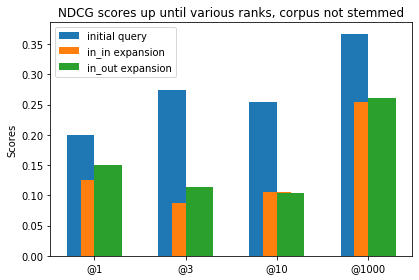

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['@1', '@3', '@10', '@1000']
base_mean = baseline_mean
in_mean= in_in_mean
out_mean= in_out_mean

x = np.arange(len(labels))  
width = 0.30  

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, base_mean, width, label='initial query')
bar2 = ax.bar(x  , in_mean, width, label='in_in expansion')
bar3 = ax.bar(x + width/2, out_mean, width, label='in_out expansion')


ax.set_ylabel('Scores')
ax.set_title('NDCG scores up until various ranks, corpus not stemmed')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

## stemming results

In [5]:
output = pd.read_csv("drive/My Drive/processed/output_stemmed.csv")

baseline = output["baseline"].apply(literal_eval)
in_out = output["in_out_q"].apply(literal_eval)
in_in = output["in_in_q"].apply(literal_eval)

baseline_mean = np.mean(np.array([x for x in baseline]),axis=0)
in_out_mean = np.mean(np.array([x for x in in_out]),axis=0)
in_in_mean = np.mean(np.array([x for x in in_in]),axis=0)



print(baseline_mean)
print(in_in_mean)
print(in_out_mean)

[0.275      0.28559503 0.2796462  0.39745562]
[0.275      0.19141544 0.16520868 0.28692073]
[0.225      0.13800938 0.12383071 0.27601091]


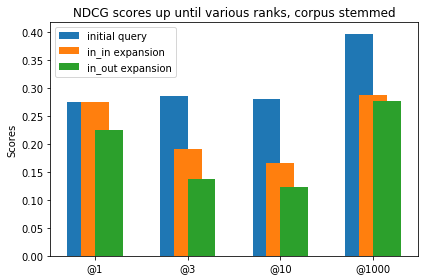

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['@1', '@3', '@10', '@1000']
base_mean = baseline_mean
in_mean= in_in_mean
out_mean= in_out_mean

x = np.arange(len(labels))  
width = 0.30  

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, base_mean, width, label='initial query')
bar2 = ax.bar(x  , in_mean, width, label='in_in expansion')
bar3 = ax.bar(x + width/2, out_mean, width, label='in_out expansion')


ax.set_ylabel('Scores')
ax.set_title('NDCG scores up until various ranks, corpus stemmed')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()